In [2]:
#pip install mplcursors

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor, Button
import numpy as np
import mplcursors as canvas

# read csv files

cause_of_death_csv = pd.read_csv("cause_of_deaths.csv")
population_csv = pd.read_csv("POP_TOTAL_DS2_en_v2.csv", skiprows=4)

cause_of_death = pd.DataFrame(cause_of_death_csv)
#cause_of_death_csv
population_csv.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55435.0,56226.0,56697.0,57029.0,57360.0,...,101342.0,101416.0,101597.0,101936.0,102393.0,102921.0,103441.0,103889.0,NaN,NaN
1,Andorra,AND,"Population, total",SP.POP.TOTL,13414.0,14376.0,15376.0,16410.0,17470.0,18551.0,...,85616.0,85474.0,84419.0,82326.0,79316.0,75902.0,72786.0,70473.0,NaN,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8994793.0,9164945.0,9343772.0,9531555.0,9728645.0,9935358.0,...,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0,NaN,NaN
3,Angola,AGO,"Population, total",SP.POP.TOTL,5270844.0,5367287.0,5465905.0,5565808.0,5665701.0,5765025.0,...,19842251.0,20520103.0,21219954.0,21942296.0,22685632.0,23448202.0,24227524.0,25021974.0,NaN,NaN
4,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2904780.0,2900247.0,2896652.0,2893654.0,2889167.0,NaN,NaN


In [4]:
population = pd.DataFrame(population_csv)
population_drop = population.drop(population.iloc[:, 3:34], axis=1)
population_drop.head()

,Country Name,Country Code,Indicator Name,1990,1991,1992,1993,1994,1995,1996,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Aruba,ABW,"Population, total",62148.0,64623.0,68235.0,72498.0,76700.0,80326.0,83195.0,...,101342.0,101416.0,101597.0,101936.0,102393.0,102921.0,103441.0,103889.0,NaN,NaN
1,Andorra,AND,"Population, total",54511.0,56674.0,58904.0,61003.0,62707.0,63854.0,64291.0,...,85616.0,85474.0,84419.0,82326.0,79316.0,75902.0,72786.0,70473.0,NaN,NaN
2,Afghanistan,AFG,"Population, total",12067570.0,12789374.0,13745630.0,14824371.0,15869967.0,16772522.0,17481800.0,...,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0,NaN,NaN
3,Angola,AGO,"Population, total",11127870.0,11472173.0,11848971.0,12246786.0,12648483.0,13042666.0,13424813.0,...,19842251.0,20520103.0,21219954.0,21942296.0,22685632.0,23448202.0,24227524.0,25021974.0,NaN,NaN
4,Albania,ALB,"Population, total",3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,...,2947314.0,2927519.0,2913021.0,2904780.0,2900247.0,2896652.0,2893654.0,2889167.0,NaN,NaN


In [5]:
cleaned_population = population_drop.drop(['2016', 'Unnamed: 61'], axis=1)
cleaned_population.head()

,Country Name,Country Code,Indicator Name,1990,1991,1992,1993,1994,1995,1996,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,"Population, total",62148.0,64623.0,68235.0,72498.0,76700.0,80326.0,83195.0,...,100830.0,101218.0,101342.0,101416.0,101597.0,101936.0,102393.0,102921.0,103441.0,103889.0
1,Andorra,AND,"Population, total",54511.0,56674.0,58904.0,61003.0,62707.0,63854.0,64291.0,...,83373.0,84878.0,85616.0,85474.0,84419.0,82326.0,79316.0,75902.0,72786.0,70473.0
2,Afghanistan,AFG,"Population, total",12067570.0,12789374.0,13745630.0,14824371.0,15869967.0,16772522.0,17481800.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
3,Angola,AGO,"Population, total",11127870.0,11472173.0,11848971.0,12246786.0,12648483.0,13042666.0,13424813.0,...,18541467.0,19183907.0,19842251.0,20520103.0,21219954.0,21942296.0,22685632.0,23448202.0,24227524.0,25021974.0
4,Albania,ALB,"Population, total",3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,...,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2904780.0,2900247.0,2896652.0,2893654.0,2889167.0


In [6]:
population_total = cleaned_population.rename(columns={"Country Name": "Country/Territory"})
population_total.head()

,Country/Territory,Country Code,Indicator Name,1990,1991,1992,1993,1994,1995,1996,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,"Population, total",62148.0,64623.0,68235.0,72498.0,76700.0,80326.0,83195.0,...,100830.0,101218.0,101342.0,101416.0,101597.0,101936.0,102393.0,102921.0,103441.0,103889.0
1,Andorra,AND,"Population, total",54511.0,56674.0,58904.0,61003.0,62707.0,63854.0,64291.0,...,83373.0,84878.0,85616.0,85474.0,84419.0,82326.0,79316.0,75902.0,72786.0,70473.0
2,Afghanistan,AFG,"Population, total",12067570.0,12789374.0,13745630.0,14824371.0,15869967.0,16772522.0,17481800.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
3,Angola,AGO,"Population, total",11127870.0,11472173.0,11848971.0,12246786.0,12648483.0,13042666.0,13424813.0,...,18541467.0,19183907.0,19842251.0,20520103.0,21219954.0,21942296.0,22685632.0,23448202.0,24227524.0,25021974.0
4,Albania,ALB,"Population, total",3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,...,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2904780.0,2900247.0,2896652.0,2893654.0,2889167.0


In [7]:
# Convert to long format
year = list(population_total.columns)[3:]
years = pd.melt(population_total, id_vars=["Country/Territory"], value_vars=year, value_name='Total Population', 
                var_name='Year')
complete = years.sort_values(by=['Country/Territory', 'Year'])
complete.head()

,Country/Territory,Year,Total Population
2,Afghanistan,1990,12067570.0
266,Afghanistan,1991,12789374.0
530,Afghanistan,1992,13745630.0
794,Afghanistan,1993,14824371.0
1058,Afghanistan,1994,15869967.0


In [214]:
# Total population by year worldwide
worldwide_population = complete.groupby("Year")["Total Population"].sum()
pd.DataFrame(worldwide_population)

,Total Population
Year,
1990,5.498513e+10
1991,5.593258e+10
1992,5.685517e+10
1993,5.777891e+10
1994,5.869488e+10
1995,5.961669e+10
1996,6.052535e+10
1997,6.143688e+10
1998,6.234027e+10


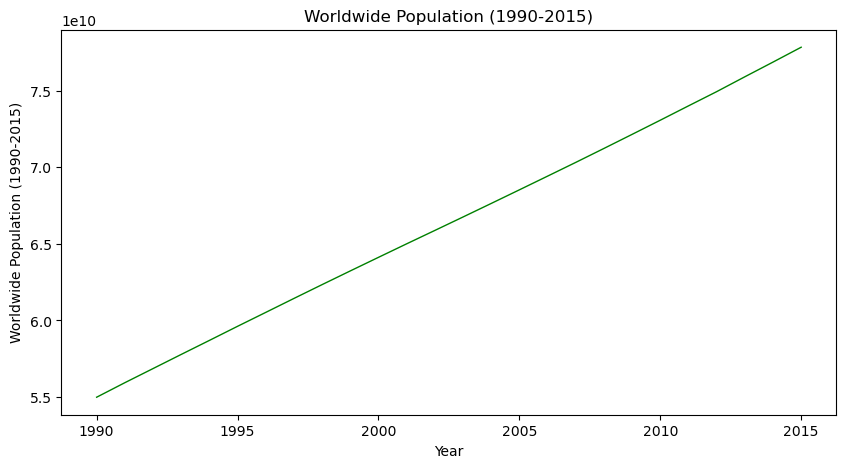

In [193]:
worldwide_population.plot(kind='line', color = "green", linewidth=1, figsize=(10,5))
plt.title("Worldwide Population (1990-2015)")
plt.xlabel("Year")
plt.ylabel("Worldwide Population (1990-2015)")
plt.savefig('worldwide_population', bbox_inches='tight')

In [9]:
death_cause = cause_of_death['Year']=cause_of_death['Year'].astype(str)

In [10]:
# Merge data of csv file
merge_data = pd.merge(cause_of_death, complete, on=['Country/Territory', 'Year'], how="left")
# merge_data = pd.merge(cause_of_death, complete, how="left", right_index=True, left_index=True)
death_and_population = merge_data.dropna()
death_and_population

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Total Population
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,3709,338,2054,4154,5945,2673,5005,323,2985,12067570.0
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,3724,351,2119,4472,6050,2728,5120,332,3092,12789374.0
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,3776,386,2404,5106,6223,2830,5335,360,3325,13745630.0
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,3862,425,2797,5681,6445,2943,5568,396,3601,14824371.0
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,3932,451,3038,6001,6664,3027,5739,420,3816,15869967.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6111,Zimbabwe,ZWE,2011,1803,722,211,3013,3479,743,1222,...,1998,358,2983,2335,2721,2062,4136,615,152,14255592.0
6112,Zimbabwe,ZWE,2012,1586,724,209,3095,2763,754,1243,...,2004,366,3065,2328,2708,2011,4132,622,152,14565482.0
6113,Zimbabwe,ZWE,2013,1448,731,209,3017,3544,732,1241,...,2013,362,2987,2289,2693,1964,4107,612,148,14898092.0
6114,Zimbabwe,ZWE,2014,1422,741,212,2977,3685,734,1257,...,2057,367,2948,2302,2715,1952,4138,615,146,15245855.0


In [194]:
# list(death_and_population.columns)
cols = death_and_population.columns.difference(['Country/Territory', 'Code', 'Year', 'Total Population'], sort=False)
pd.DataFrame(cols)

,0
0,Meningitis
1,Alzheimer's Disease and Other Dementias
2,Parkinson's Disease
3,Nutritional Deficiencies
4,Malaria
5,Drowning
6,Interpersonal Violence
7,Maternal Disorders
8,HIV/AIDS
9,Drug Use Disorders


In [12]:
new_df = death_and_population.drop(['Country/Territory', 'Code', 'Total Population'], axis=1)
disease_columns = new_df.columns.difference(['Year'], sort=False)
disease_columns

Index(['Meningitis', 'Alzheimer's Disease and Other Dementias',
       'Parkinson's Disease', 'Nutritional Deficiencies', 'Malaria',
       'Drowning', 'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis'],
      dtype='object')

In [13]:
# calculate total deaths per disease per year
diseases = new_df.groupby("Year")[disease_columns].sum()
diseases.head()

,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
Year,,,,,,,,,,,,,,,,,,,,,
1990,410380,514547,135579,728270,746531,427547,333345,287402,309986,49668,...,614069,554276,72995,628929,943347,2944286,906417,1686682,105604,158001
1991,406830,535166,139035,701379,762780,421532,341569,283404,399526,54939,...,630677,565954,72671,604709,947761,2998355,920180,1708697,106216,157279
1992,404817,556357,142632,673278,759891,413143,353937,284769,503109,58972,...,650723,580907,72470,580088,954382,3053400,933623,1729899,106271,156036
1993,399347,578398,147084,646861,764315,408285,361216,279160,621263,62210,...,672795,595156,72014,558070,959781,3101272,951635,1753777,106426,154457
1994,392294,599401,150556,622371,756870,404119,364844,278903,750805,66280,...,692555,610804,71620,538162,973002,3124997,967095,1772376,106996,152141


In [148]:
# calculate total deaths per disease from 1990-2015
total_deaths_per_disease = diseases.sum()
top_5_diseases = total_deaths_per_disease.nlargest(n=5)
disease_top_5 = pd.DataFrame(top_5_diseases)
disease_top_5

,0
Cardiovascular Diseases,325454778
Neoplasms,174622237
Chronic Respiratory Diseases,84950983
Lower Respiratory Infections,68628060
Neonatal Disorders,64604960


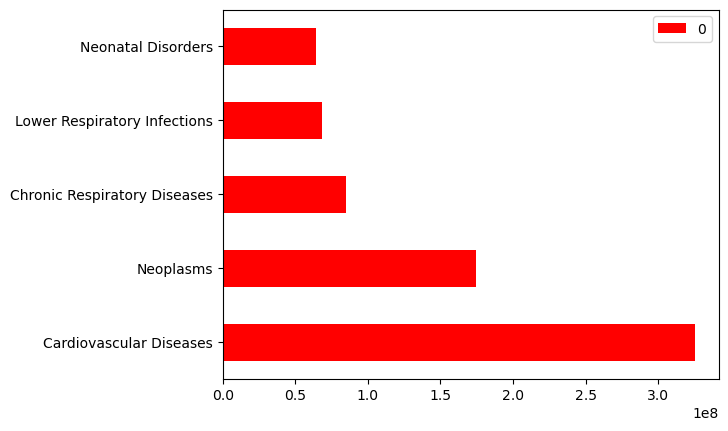

In [213]:
disease_top_5.plot(kind='barh', color='r')
plt.savefig('disease_top_5', bbox_inches='tight')

In [200]:
bottom_5_diseases = total_deaths_per_disease.nsmallest(n=5)
disease_bottom_5 = pd.DataFrame(bottom_5_diseases)
disease_bottom_5

,0
Environmental Heat and Cold Exposure,1029121
Exposure to Forces of Nature,1330190
Drug Use Disorders,1840834
Poisonings,1882646
Conflict and Terrorism,2329031


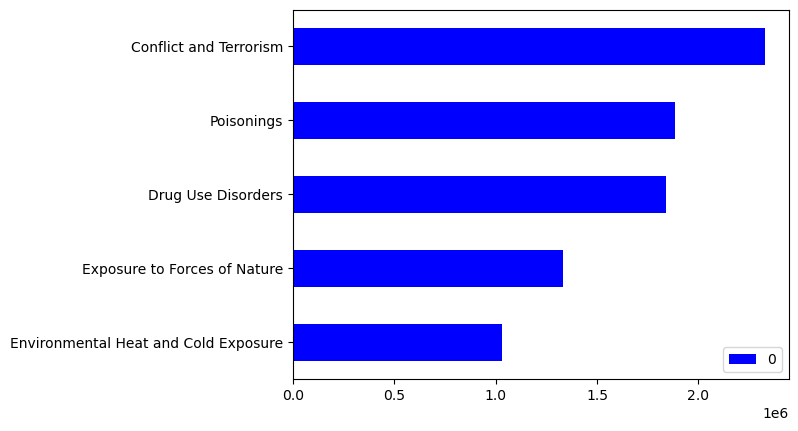

In [212]:
disease_bottom_5.plot(kind='barh', color='b')
plt.savefig('disease_bottom_5', bbox_inches='tight')

In [144]:
# calculate total deaths per year from 1990-2015
total_deaths_per_year = diseases.sum(axis=1)
#total_deaths_per_year
top_5_deaths = total_deaths_per_year.nlargest(n=5)
pd.DataFrame(top_5_deaths)

,0
Year,
2015,47039086
2014,46459889
2013,46195990
2012,45813367
2011,45714471


In [142]:
bottom_5_deaths = total_deaths_per_year.nsmallest(n=5)
pd.DataFrame(bottom_5_deaths)

,0
Year,
1990,39567671
1991,40114355
1992,40381094
1993,40770606
1995,41419374


In [18]:
# calculate total deaths from 1990-2015
total_deaths = diseases.sum().sum()
total_deaths

1133309213

In [150]:
# percentage of top 5 worldwide deaths per disease
percentages = (total_deaths_per_disease / total_deaths) * 100

top_5_percent = percentages.nlargest(n=5)
top_5_percent

Cardiovascular Diseases         28.717209
Neoplasms                       15.408172
Chronic Respiratory Diseases     7.495835
Lower Respiratory Infections     6.055546
Neonatal Disorders               5.700559
dtype: float64

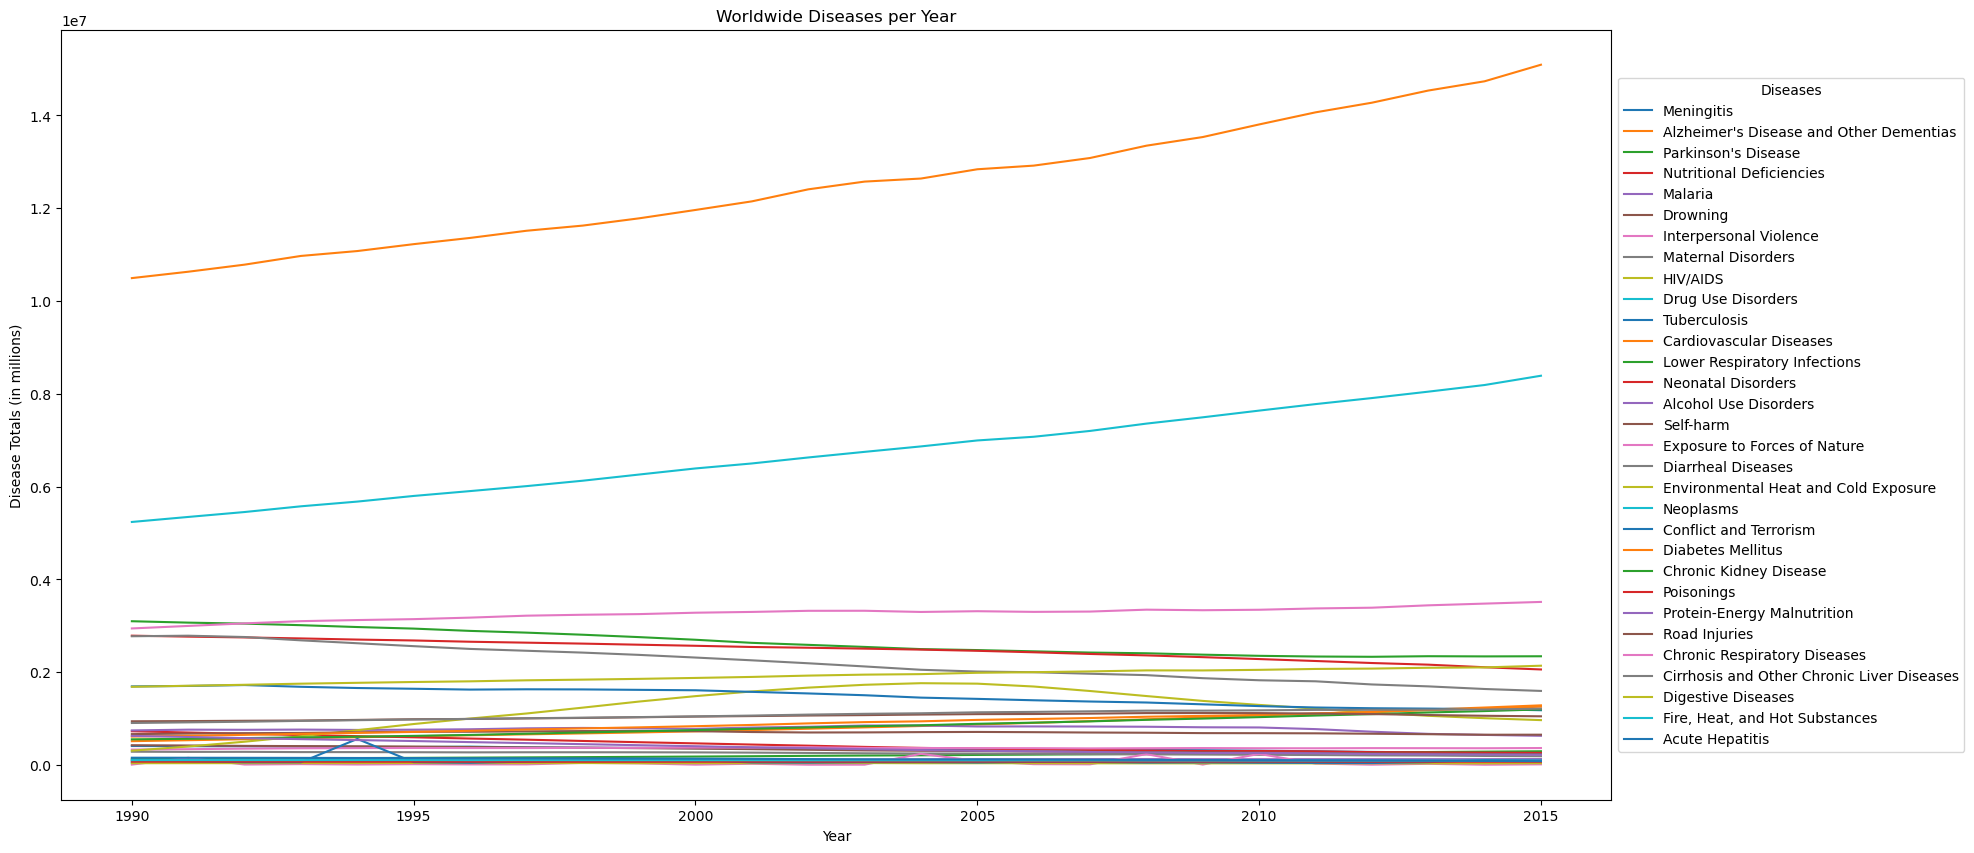

In [33]:
# create a graph to better analyze the data
# sum of different diseases per year worldwide
diseases.plot(kind='line',figsize=(20,10))
plt.title("Worldwide Diseases per Year")
plt.xlabel("Year")
plt.ylabel("Disease Totals (in millions)")
plt.legend(title='Diseases',loc='center left', bbox_to_anchor=(1, 0.5))
# mplcursors.cursor()

plt.savefig('total', bbox_inches='tight')

In [507]:
## Another way to graph data
# create a graph to better analyze the data
# sum of different diseases per year worldwide

# for diseases in cols:
#     total = death_and_population.groupby("Year")[diseases].sum()
#     total.plot(kind='line', x='Year',figsize=(20,10))
    
#     plt.title("Worldwide Diseases per Year")
#     plt.xlabel("Year")
#     plt.ylabel("Disease Totals (in millions)")
#     plt.legend(title='Diseases',loc='center left', bbox_to_anchor=(1, 0.5))
#     mplcursors.cursor()

#     plt.savefig('total', bbox_inches='tight')

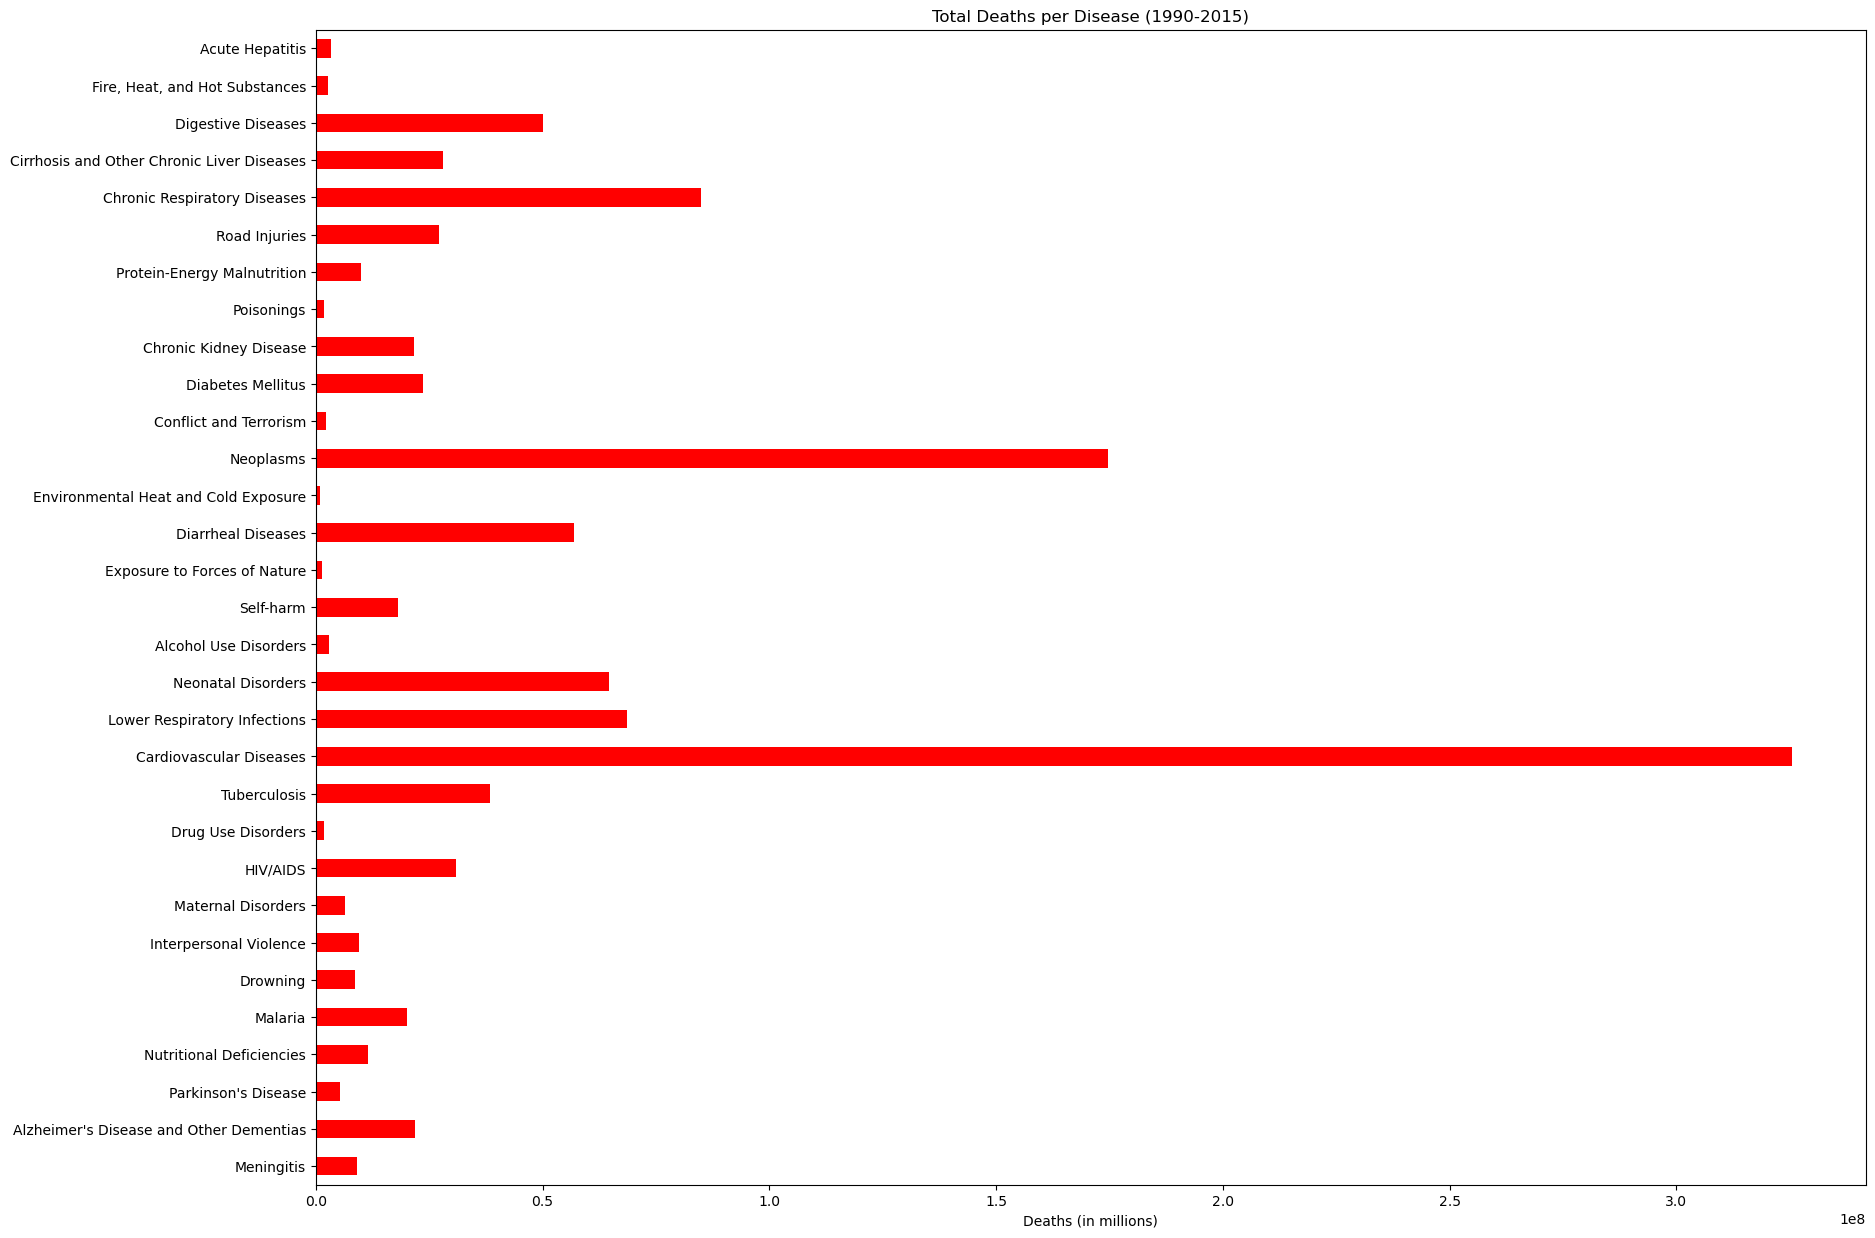

In [513]:
total_deaths_per_disease.plot(kind='barh',color = 'red',figsize=(20,15))
plt.title("Total Deaths per Disease (1990-2015)")
plt.xlabel("Deaths (in millions)")
plt.savefig('total_deaths_per_disease', bbox_inches='tight')

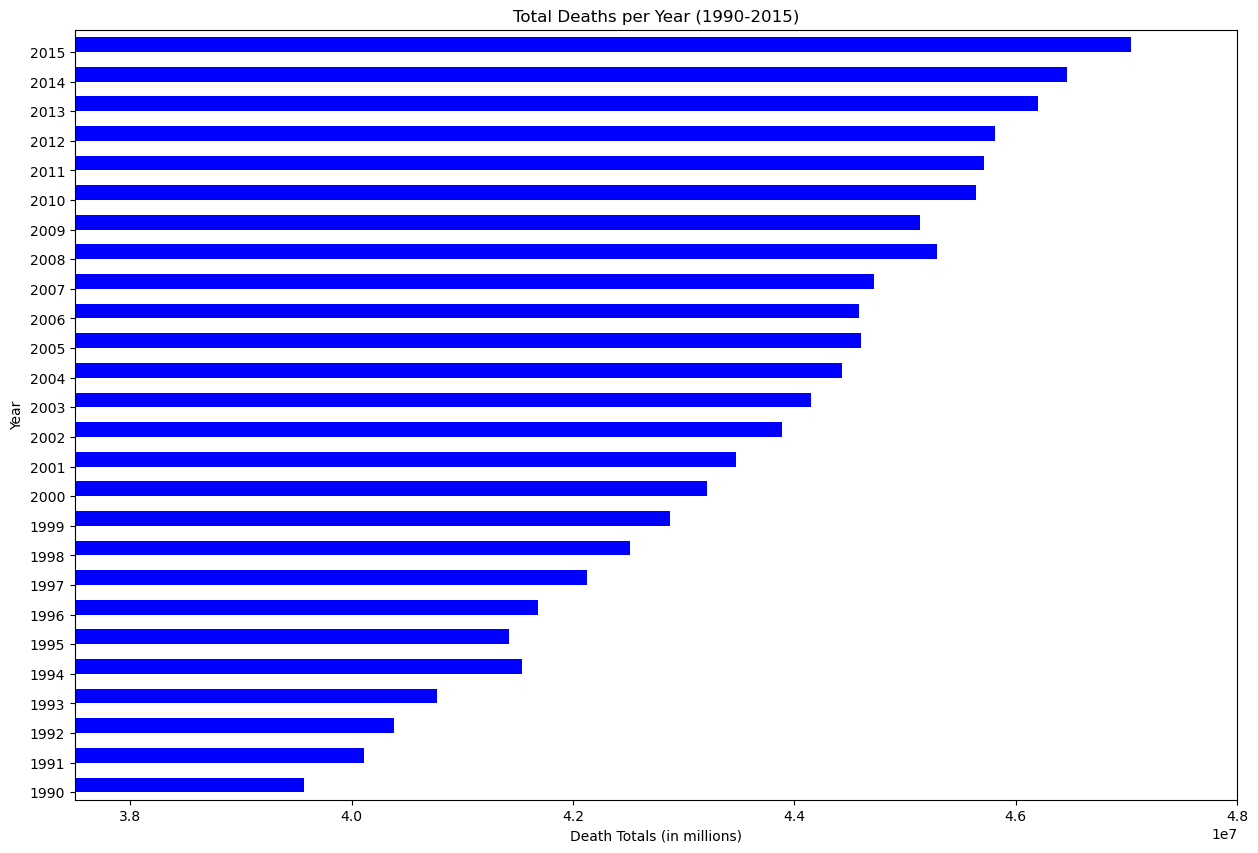

In [179]:
total_deaths_per_year.plot(kind='barh', align='edge',color = 'blue',figsize=(15,10))
plt.xlim(3.75e7, 4.8e7)
plt.title("Total Deaths per Year (1990-2015)")
plt.xlabel("Death Totals (in millions)")
plt.savefig('total_deaths_per_year', bbox_inches='tight')